# Import bibliotek

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
import tensorflow.keras.layers as tfl

# Wczytywanie danych California housing prices

In [ ]:
from sklearn.datasets import fetch_california_housing

california_housing = fetch_california_housing(as_frame=True)

# Eksploracja danych

In [ ]:
california_housing.frame.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
california_housing.frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


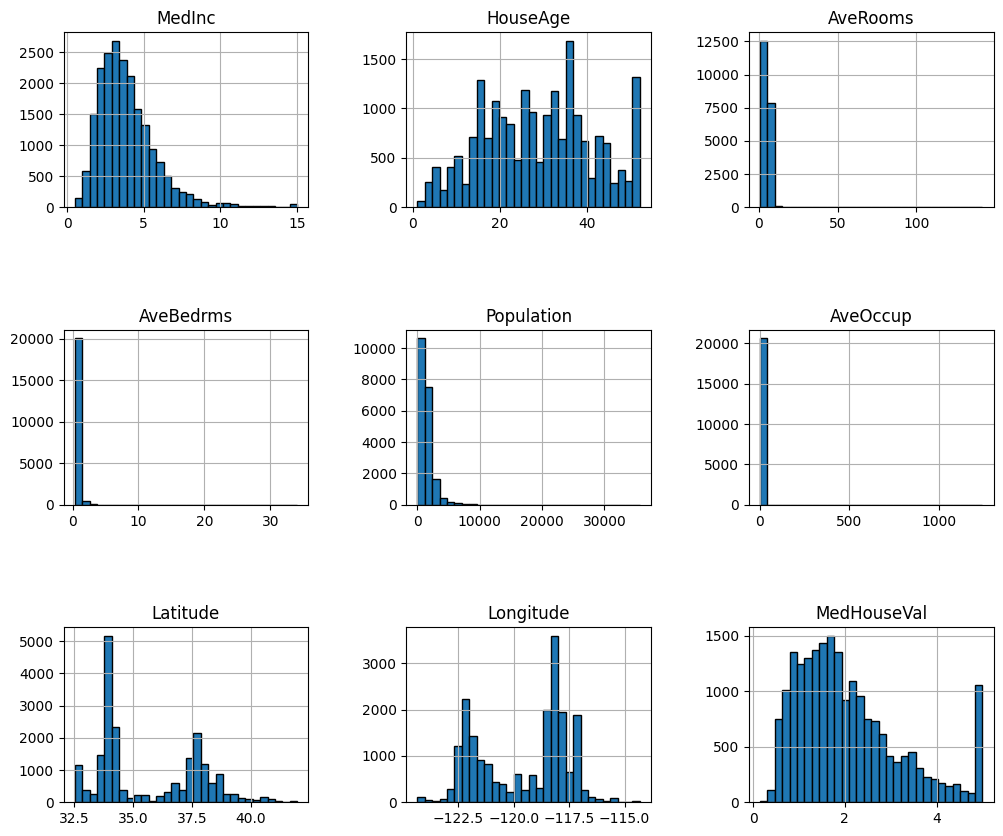

In [ ]:
import matplotlib.pyplot as plt

california_housing.frame.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

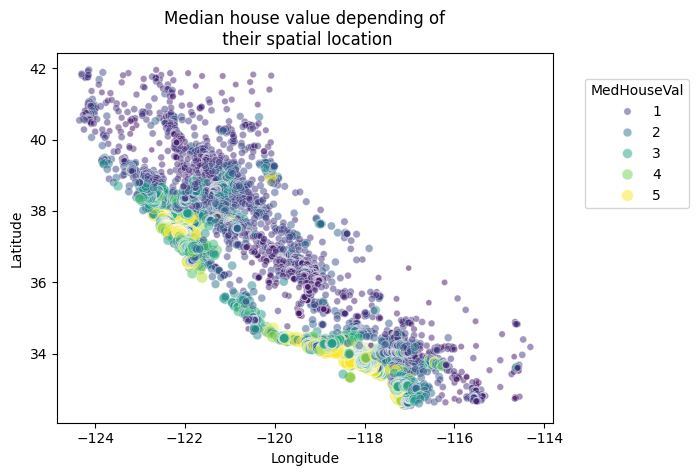

In [ ]:
import seaborn as sns

sns.scatterplot(
    data=california_housing.frame,
    x="Longitude",
    y="Latitude",
    size="MedHouseVal",
    hue="MedHouseVal",
    palette="viridis",
    alpha=0.5,
)
plt.legend(title="MedHouseVal", bbox_to_anchor=(1.05, 0.95), loc="upper left")
_ = plt.title("Median house value depending of\n their spatial location")

# Podział na dane treningowe i testowe

In [ ]:
from sklearn.model_selection import train_test_split

X = california_housing.data
y = california_housing.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

# Standaryzacja danych

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model 1 - Płytka sieć neuronowa

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(20, activation='relu', input_shape=[X.shape[1]]),
    layers.Dense(1)
])

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
history = model.fit(X_train_scaled, y_train, epochs=50, validation_data=(X_test_scaled, y_test))

Epoch 1/50
581/581 [==============================] - 2s 2ms/step - loss: 1.8220 - val_loss: 0.6690
Epoch 2/50
581/581 [==============================] - 1s 2ms/step - loss: 0.5714 - val_loss: 0.4860
Epoch 3/50
581/581 [==============================] - 1s 2ms/step - loss: 0.4691 - val_loss: 0.4416
Epoch 4/50
581/581 [==============================] - 2s 3ms/step - loss: 0.4408 - val_loss: 0.4246
Epoch 5/50
581/581 [==============================] - 2s 3ms/step - loss: 0.4226 - val_loss: 0.4095
Epoch 6/50
581/581 [==============================] - 1s 2ms/step - loss: 0.4157 - val_loss: 0.3975
Epoch 7/50
581/581 [==============================] - 1s 2ms/step - loss: 0.4040 - val_loss: 0.3915
Epoch 8/50
581/581 [==============================] - 1s 2ms/step - loss: 0.3988 - val_loss: 0.3864
Epoch 9/50
581/581 [==============================] - 1s 2ms/step - loss: 0.3895 - val_loss: 0.3785
Epoch 10/50
581/581 [==============================] - 1s 2ms/step - loss: 0.3851 - val_loss: 0.3751

# Krzywa uczenia modelu

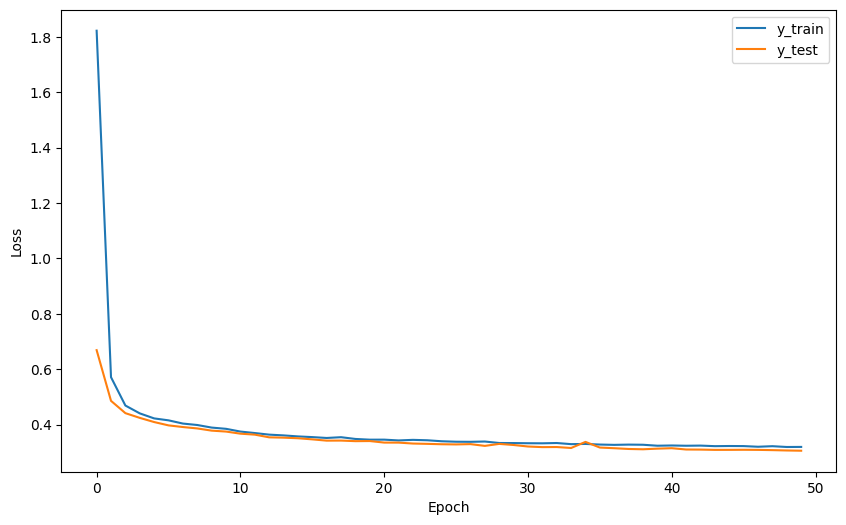

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='y_train')
plt.plot(history.history['val_loss'], label='y_test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Ewaluacja modelu - metryki

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

y_pred = model.predict(X_test_scaled)

mse = model.evaluate(X_test_scaled, y_test)
print("Mean Squared Error:", mse)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)

65/65 [==============================] - 0s 1ms/step - loss: 0.3060
Mean Squared Error: 0.3059934675693512
Mean Absolute Error: 0.39367131137647826
R^2 Score: 0.7728021905709769


# Ewaluacja modelu - porównanie predykcji z rzeczywistymi wartościami

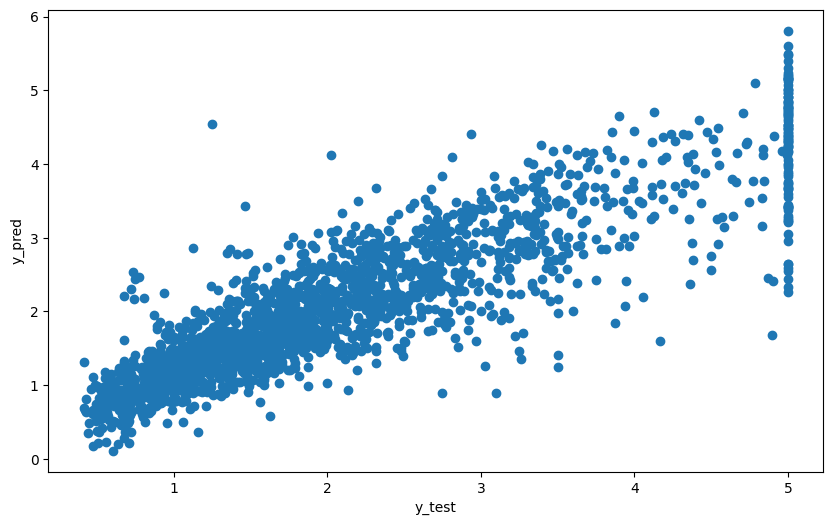

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

# Model 2 - sieć neuronowa złożona z kilku warstw

In [ ]:
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[X.shape[1]]),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train_scaled, y_train, epochs=50, validation_data=(X_test_scaled, y_test))

Epoch 1/50
581/581 [==============================] - 2s 2ms/step - loss: 0.5893 - val_loss: 0.3852
Epoch 2/50
581/581 [==============================] - 1s 2ms/step - loss: 0.3805 - val_loss: 0.3929
Epoch 3/50
581/581 [==============================] - 1s 2ms/step - loss: 0.3408 - val_loss: 0.3171
Epoch 4/50
581/581 [==============================] - 1s 2ms/step - loss: 0.3207 - val_loss: 0.3078
Epoch 5/50
581/581 [==============================] - 1s 2ms/step - loss: 0.3063 - val_loss: 0.2916
Epoch 6/50
581/581 [==============================] - 2s 3ms/step - loss: 0.2998 - val_loss: 0.2884
Epoch 7/50
581/581 [==============================] - 2s 4ms/step - loss: 0.2925 - val_loss: 0.2719
Epoch 8/50
581/581 [==============================] - 2s 4ms/step - loss: 0.2919 - val_loss: 0.2738
Epoch 9/50
581/581 [==============================] - 2s 3ms/step - loss: 0.2829 - val_loss: 0.2550
Epoch 10/50
581/581 [==============================] - 1s 2ms/step - loss: 0.2774 - val_loss: 0.2623

# Krzywa uczenia modelu

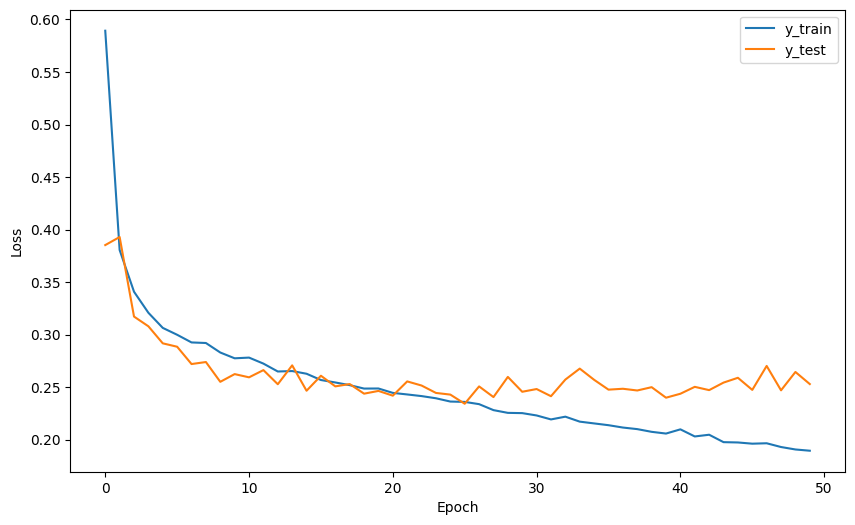

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='y_train')
plt.plot(history.history['val_loss'], label='y_test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Ewaluacja modelu - metryki

In [ ]:
y_pred = model.predict(X_test_scaled)

mse = model.evaluate(X_test_scaled, y_test)
print("Mean Squared Error:", mse)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)

65/65 [==============================] - 0s 1ms/step - loss: 0.2528
Mean Squared Error: 0.2528151571750641
Mean Absolute Error: 0.3320623238765662
R^2 Score: 0.8122866409880172


# Wykres porównujący predykcje i rzeczywiste wartości

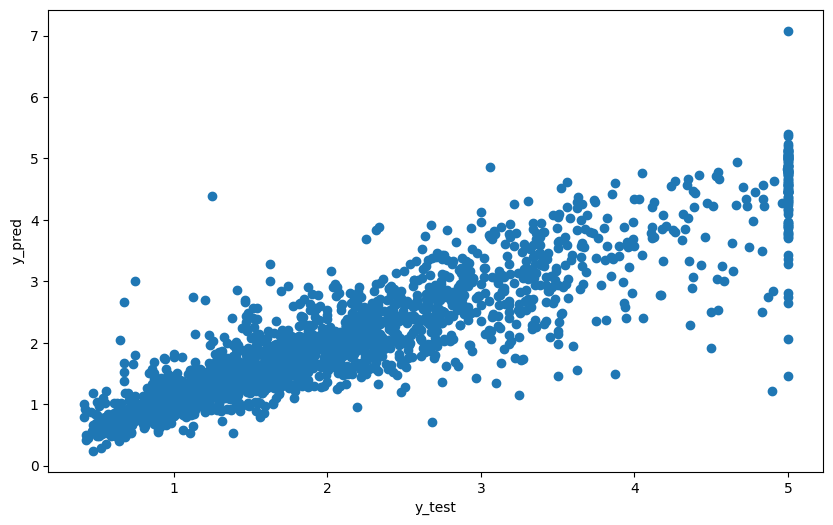

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

# Optymalizacja hiperparametrów

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def create_model(hidden_layers=(64, 128, 64), activation='relu', solver='adam', alpha=0.0001, random_state=None):
    model = MLPRegressor(
        hidden_layer_sizes=hidden_layers,
        activation=activation,
        solver=solver,
        alpha=alpha,
        max_iter=50,
        random_state=random_state
    )

    return model

mlp_regressor = create_model()

param_grid = {
    'hidden_layer_sizes': [(32, 64, 32), (64, 128, 64), (128, 256, 128)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01]
}

grid_search = GridSearchCV(estimator=mlp_regressor, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3)
grid_result = grid_search.fit(X_train_scaled, y_train)

best_params = grid_result.best_params_
best_model = grid_result.best_estimator_

print("Best Hyperparameters:", best_params)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py

Best Hyperparameters: {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (128, 256, 128), 'solver': 'adam'}


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


# Ewaluacja najlepszego modelu - metryki

---



In [ ]:
y_pred_best_model = best_model.predict(X_test_scaled)

mse_best_model = mean_squared_error(y_test, y_pred_best_model)
mae_best_model = mean_absolute_error(y_test, y_pred_best_model)
r2_best_model = r2_score(y_test, y_pred_best_model)

print(f"Best Model Metrics on Test Set:")
print("Mean Squared Error:", mse_best_model)
print("Mean Absolute Error:", mae_best_model)
print("R^2 Score:", r2_best_model)
print("Best Hyperparameters:", best_params)

Best Model Metrics on Test Set:
Mean Squared Error: 0.2422532566350809
Mean Absolute Error: 0.325121144581722
R^2 Score: 0.8201287944500907
Best Hyperparameters: {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (128, 256, 128), 'solver': 'adam'}
